# Pixel classification in multi-channel images
APOC also accepts lists of images as input for training and prediction. This can be used for example for semantic segmentation in multi-channel images showing nuclei, membranes and cytoplasm in between.

In [1]:
from skimage.data import cells3d
from skimage.io import imsave, imread
import napari
import numpy as np
import matplotlib.pyplot as plt
from pyclesperanto_prototype import imshow

In [2]:
image = cells3d()

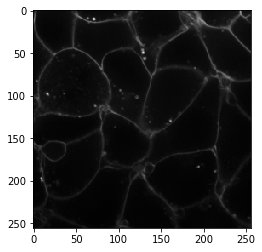

In [3]:
image_ch1 = image[30, 0]
imshow(image_ch1)

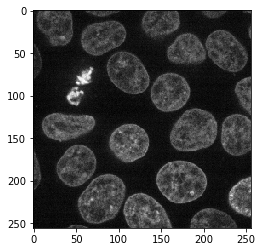

In [4]:
image_ch2 = image[30, 1]
imshow(image_ch2)

In [5]:
filename = '../../data/cells_annotation.tif'
            
annotation = imread(filename)

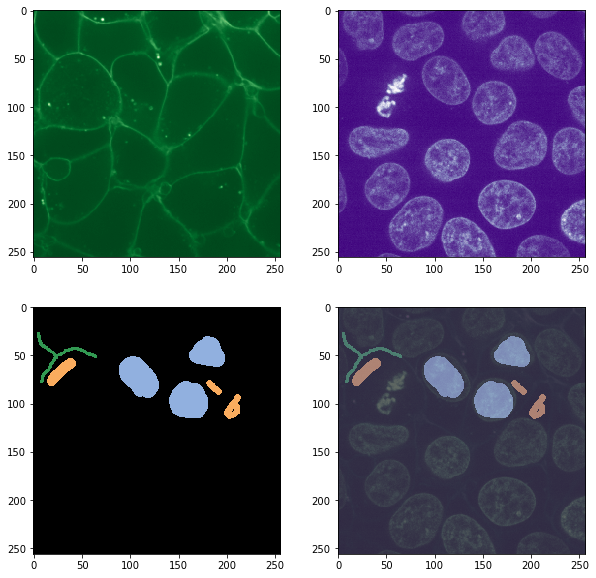

In [6]:
fix, axs = plt.subplots(2,2, figsize=(10,10))

imshow(image_ch1, plot=axs[0,0], colormap="Greens_r")
imshow(image_ch2, plot=axs[0,1], colormap="Purples_r")
imshow(annotation, labels=True, plot=axs[1,0])
imshow(image_ch1, continue_drawing=True, plot=axs[1,1], colormap="Greens_r", alpha=0.5)
imshow(image_ch2, continue_drawing=True, plot=axs[1,1], colormap="Purples_r", alpha=0.5)
imshow(annotation, labels=True, plot=axs[1,1], alpha=0.5)

## Training

In [7]:
from apoc import PixelClassifier

# define features
features = "sobel_of_gaussian_blur=2 laplace_box_of_gaussian_blur=2 gaussian_blur=2 sobel_of_gaussian_blur=4 laplace_box_of_gaussian_blur=4 gaussian_blur=4"

# this is where the model will be saved
cl_filename = 'test.cl'

clf = PixelClassifier(opencl_filename=cl_filename)
clf.train(features=features, ground_truth=annotation, image=[image_ch1, image_ch2])


## Prediction

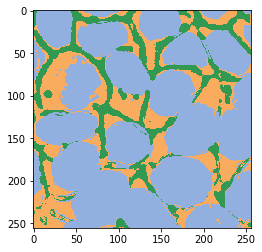

In [8]:
result = clf.predict(image=[image_ch1, image_ch2])
imshow(result, labels=True)